# Principal Component Analysis

In [79]:
#needed to work!
available_graphics_toolkits
graphics_toolkit('gnuplot')

ans = 
{
  [1,1] = gnuplot
}


In [80]:
%% Initialization
clear ; close all; clc

warning ("off", "Octave:broadcast");
warning ("off", "Octave:possible-matlab-short-circuit-operator");
warning ("off", "Octave:divide-by-zero");

In [81]:
%plot -f svg

## Load Example Dataset

Visualizing example dataset for PCA.



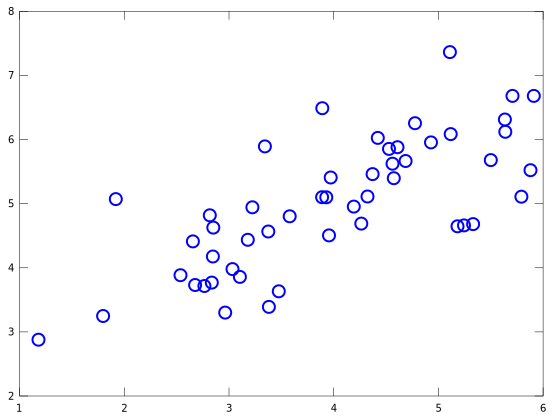

In [82]:
fprintf('Visualizing example dataset for PCA.\n\n');

%  The following command loads the dataset. You should now have the 
%  variable X in your environment
load ('data/ex7data1.mat');

%  Visualize the example dataset
plot(X(:, 1), X(:, 2), 'bo');
%axis([0.5 6.5 2 8]); 
%axis square;

## Principal Component Analysis


Running PCA on example dataset.

Top eigenvector: 
 U(:,1) = -0.707107 -0.707107 

(you should expect to see -0.707107 -0.707107)


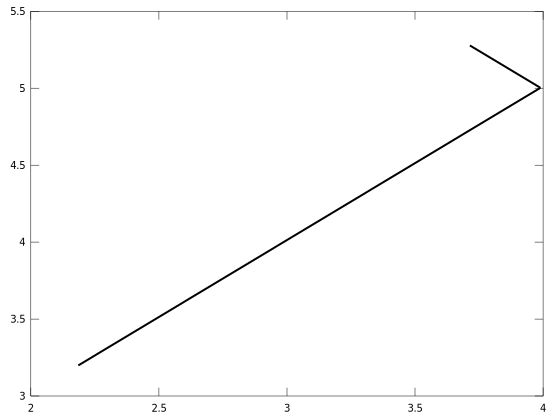

In [83]:
fprintf('\nRunning PCA on example dataset.\n\n');

%  Before running PCA, it is important to first normalize X
[X_norm, mu, sigma] = featureNormalize(X);

%  Run PCA
[U, S] = pca(X_norm);

%  Compute mu, the mean of the each feature

%  Draw the eigenvectors centered at mean of data. These lines show the
%  directions of maximum variations in the dataset.
hold on;
drawLine(mu, mu + 1.5 * S(1,1) * U(:,1)', '-k', 'LineWidth', 2);
drawLine(mu, mu + 1.5 * S(2,2) * U(:,2)', '-k', 'LineWidth', 2);
hold off;

fprintf('Top eigenvector: \n');
fprintf(' U(:,1) = %f %f \n', U(1,1), U(2,1));
fprintf('\n(you should expect to see -0.707107 -0.707107)\n');

## Dimensionality Reduction


Dimension reduction on example dataset.

Projection of the first example: 1.481274

(this value should be about 1.481274)

Approximation of the first example: -1.047419 -1.047419

(this value should be about  -1.047419 -1.047419)



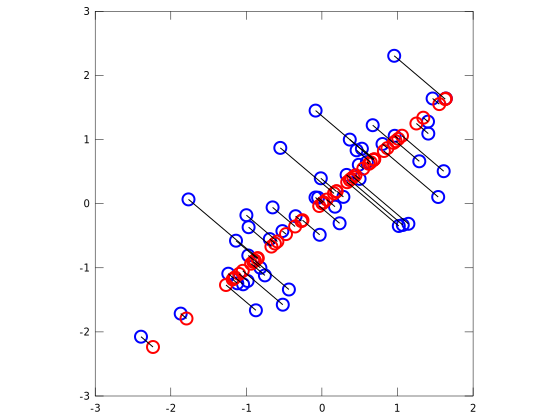

In [88]:
fprintf('\nDimension reduction on example dataset.\n\n');

%  Plot the normalized dataset (returned from pca)
plot(X_norm(:, 1), X_norm(:, 2), 'bo');
%axis([-4 3 -4 3]); 
axis square

%  Project the data onto K = 1 dimension
K = 1;
Z = projectData(X_norm, U, K);
fprintf('Projection of the first example: %f\n', Z(1));
fprintf('\n(this value should be about 1.481274)\n\n');

X_rec  = recoverData(Z, U, K);
fprintf('Approximation of the first example: %f %f\n', X_rec(1, 1), X_rec(1, 2));
fprintf('\n(this value should be about  -1.047419 -1.047419)\n\n');

%  Draw lines connecting the projected points to the original points
hold on;
plot(X_rec(:, 1), X_rec(:, 2), 'ro');
for i = 1:size(X_norm, 1)
    drawLine(X_norm(i,:), X_rec(i,:), '--k', 'LineWidth', 1);
end
hold off

## Loading and Visualizing Face Data


Loading face dataset.



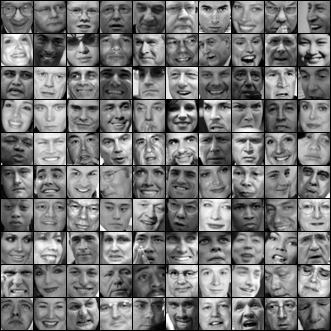

In [89]:
fprintf('\nLoading face dataset.\n\n');

%  Load Face dataset
load ('data/ex7faces.mat')

%  Display the first 100 faces in the dataset
displayData(X(1:100, :));

## PCA on Face Data: Eigenfaces


Running PCA on face dataset.
(this mght take a minute or two ...)



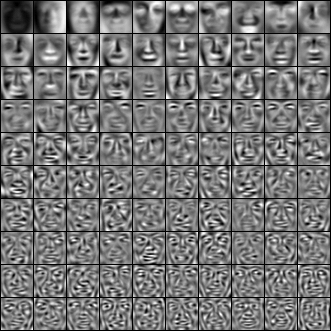

In [97]:
fprintf(['\nRunning PCA on face dataset.\n' ...
         '(this mght take a minute or two ...)\n\n']);

%  Before running PCA, it is important to first normalize X by subtracting 
%  the mean value from each feature
[X_norm, mu, sigma] = featureNormalize(X);

%  Run PCA
[U, S] = pca(X_norm);

%  Visualize the top 36 eigenvectors found
displayData(U(:, 1:100)');

## Dimensionality Reduction for Faces

In [98]:
fprintf('\nDimension reduction for face dataset.\n\n');

K = 100;
Z = projectData(X_norm, U, K);

fprintf('The projected data Z has a size of: ')
fprintf('%d ', size(Z));


Dimension reduction for face dataset.

The projected data Z has a size of: 
5000 100 
The projected data Z has a size of: 5000 100 


## Visualization of Faces after PCA Dimension Reduction

In [99]:
%plot -f png


Visualizing the projected (reduced dimension) faces.



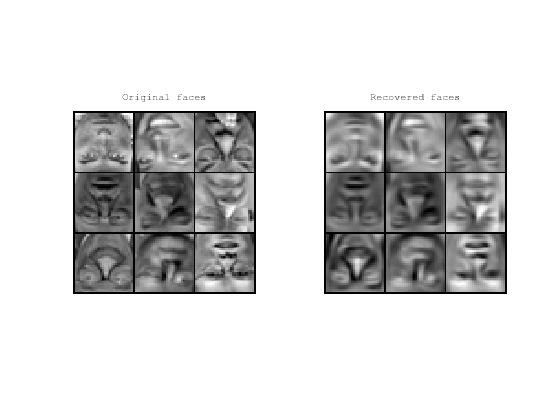

In [100]:
fprintf('\nVisualizing the projected (reduced dimension) faces.\n\n');

K = 100;
X_rec  = recoverData(Z, U, K);

% Display normalized data
subplot(1, 2, 1);
%displayData(flipud(X_norm(1:4,:)));
displayData(X_norm(1:9,:));
%imagesc(flipud(X),clims)
title('Original faces');
axis square;

% Display reconstructed data from only k eigenfaces
subplot(1, 2, 2);
displayData(X_rec(1:9,:));
title('Recovered faces');
axis square;